In [1]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [3]:
DATASET_PATH = '~/Downloads/Geekbrains/PythonLibs/kurs_project/train.csv'
PREPARED_DATASET_PATH = './train_prepared.csv'

In [4]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [7]:
feature_names = df.columns.tolist()

In [8]:
feature_names.remove('Price')
target_name = 'Price'
feature_names

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [9]:
df = df[feature_names + [target_name]]
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [10]:
df["Ecology_2"].unique()

array(['B', 'A'], dtype=object)

In [11]:
ec_map = {
    "B": 1,
    "A": 0,
}

df["Ecology_2"] = df["Ecology_2"].map(ec_map)

In [12]:
df["Ecology_3"].unique()

array(['B', 'A'], dtype=object)

In [13]:
df["Ecology_3"] = df["Ecology_3"].map(ec_map)

In [14]:
df["Shops_2"].unique()

array(['B', 'A'], dtype=object)

In [15]:
df["Shops_2"] = df["Shops_2"].map(ec_map)

In [16]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


In [17]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float64']).columns.tolist()
feature_names_for_stand

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',
 'Healthcare_1']

In [18]:
# StandardScaler() Для каждой фичи х делает: (x - mean) / std

scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [19]:
stand_features

array([[ 0.13043946, -0.39578028, -0.08994988, ..., -0.53270283,
        -0.25052909,         nan],
       [ 1.32166737,  0.44486692,  0.03304776, ..., -0.53270283,
        -0.99805257, -0.88397063],
       [ 0.13043946, -0.53984214, -0.09279254, ..., -0.08993991,
        -0.58158849, -0.89473996],
       ...,
       [-1.06078845, -0.39780109,         nan, ...,  0.50041065,
        -0.39237278,         nan],
       [ 0.13043946, -0.60373291, -0.03895713, ..., -1.12305339,
         1.58469359, -0.80075307],
       [-1.06078845, -0.83813275, -0.18602229, ...,  0.64799829,
        -0.99864062, -1.08956694]])

In [20]:
stand_features.shape

(10000, 7)

In [21]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,0.130439,-0.395780,-0.089950,-0.009569,7,-0.532703,1969,-0.250529,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,1.321667,0.444867,0.033048,0.060460,7,-0.532703,1978,-0.998053,1,1,46,10309,1,-0.883971,1,16,1,300009.450063
2,4765,53,0.130439,-0.539842,-0.092793,-0.219657,8,-0.089940,1968,-0.581588,1,1,34,7759,0,-0.894740,1,3,1,220925.908524
3,5809,58,0.130439,-0.140699,0.180109,0.095474,8,0.647998,1977,2.680470,1,1,23,5735,3,-0.057669,0,5,1,175616.227217
4,10783,99,-1.060788,-0.791473,-0.155660,0.025445,11,-0.089940,1976,-0.894969,1,1,35,5776,1,0.915487,2,4,1,150226.531644


In [22]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

## Разбиение датасета на тренировочный и тестовый

In [23]:
X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [24]:
LS_mean = X_train["LifeSquare"].mean()
print(LS_mean)
X_train["LifeSquare"].fillna(LS_mean, inplace=True)

0.003752951440466228


In [25]:
HC_mean = X_train["Healthcare_1"].mean()
print(HC_mean)
X_train["Healthcare_1"].fillna(HC_mean, inplace=True)

-0.008838970323243458


In [26]:
X_test["LifeSquare"].fillna(LS_mean, inplace=True)

In [27]:
X_test["Healthcare_1"].fillna(HC_mean, inplace=True)

In [28]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

## Random Forest Regressor

R2:	0.732
RMSE:	48070.784
MSE:	2310800251.466


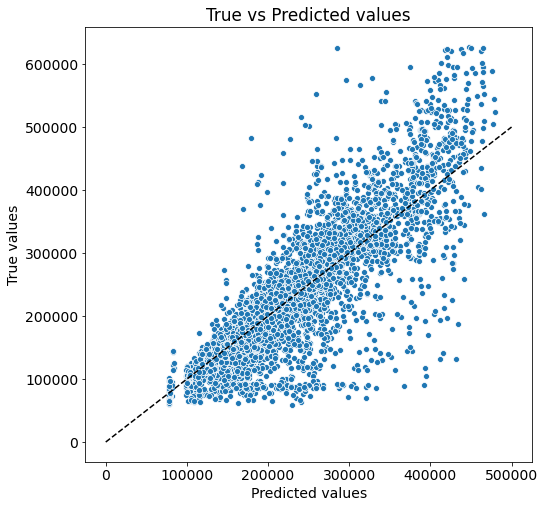

In [29]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.664
RMSE:	53770.018
MSE:	2891214805.84


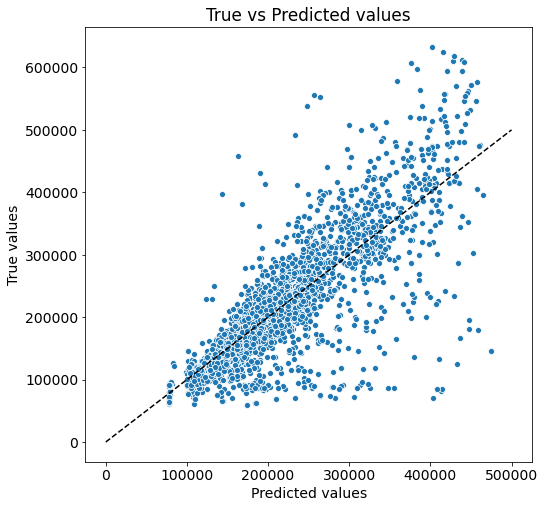

In [30]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [31]:
X_valid = pd.read_csv('~/Downloads/Geekbrains/PythonLibs/kurs_project/test.csv', sep = ',')

In [32]:
X_valid["Ecology_2"] = X_valid["Ecology_2"].map(ec_map)
X_valid["Ecology_3"] = X_valid["Ecology_3"].map(ec_map)
X_valid["Shops_2"] = X_valid["Shops_2"].map(ec_map)
X_valid["LifeSquare"].fillna(LS_mean, inplace=True)
X_valid["Healthcare_1"].fillna(HC_mean, inplace=True)
X_valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,-0.008839,0,0,1
1,15856,74,2.0,69.263183,0.003753,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,-0.008839,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.000000,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,-0.008839,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,-0.008839,0,0,0


In [38]:
y_valid_preds = rf_model.predict(X_valid)
y_valid_preds.shape

(5000,)